## we apply the deep learning in the airlines data 

In [1]:
url = "http://h2o-public-test-data.s3.amazonaws.com/smalldata/airlines/allyears2k_headers.zip"

In [2]:
import h2o
h2o.init()


Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "1.8.0_242"; OpenJDK Runtime Environment (build 1.8.0_242-8u242-b08-1~deb9u1-b08); OpenJDK 64-Bit Server VM (build 25.242-b08, mixed mode)
  Starting server from /opt/conda/lib/python3.6/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpbldn6vug
  JVM stdout: /tmp/tmpbldn6vug/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpbldn6vug/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,03 secs
H2O cluster timezone:,Etc/UTC
H2O data parsing timezone:,UTC
H2O cluster version:,3.28.0.4
H2O cluster version age:,"28 days, 19 hours and 4 minutes"
H2O cluster name:,H2O_from_python_unknownUser_iqi0ko
H2O cluster total nodes:,1
H2O cluster free memory:,3.556 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"


In [3]:
data = h2o.import_file(url)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [4]:
data.head()

Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,IsArrDelayed,IsDepDelayed
1987,10,14,3,741,730,912,849,PS,1451,NA,91,79,nan,23,11,SAN,SFO,447,nan,nan,0,NA,0,nan,nan,nan,nan,nan,YES,YES
1987,10,15,4,729,730,903,849,PS,1451,NA,94,79,nan,14,-1,SAN,SFO,447,nan,nan,0,NA,0,nan,nan,nan,nan,nan,YES,NO
1987,10,17,6,741,730,918,849,PS,1451,NA,97,79,nan,29,11,SAN,SFO,447,nan,nan,0,NA,0,nan,nan,nan,nan,nan,YES,YES
1987,10,18,7,729,730,847,849,PS,1451,NA,78,79,nan,-2,-1,SAN,SFO,447,nan,nan,0,NA,0,nan,nan,nan,nan,nan,NO,NO
1987,10,19,1,749,730,922,849,PS,1451,NA,93,79,nan,33,19,SAN,SFO,447,nan,nan,0,NA,0,nan,nan,nan,nan,nan,YES,YES
1987,10,21,3,728,730,848,849,PS,1451,NA,80,79,nan,-1,-2,SAN,SFO,447,nan,nan,0,NA,0,nan,nan,nan,nan,nan,NO,NO
1987,10,22,4,728,730,852,849,PS,1451,NA,84,79,nan,3,-2,SAN,SFO,447,nan,nan,0,NA,0,nan,nan,nan,nan,nan,YES,NO
1987,10,23,5,731,730,902,849,PS,1451,NA,91,79,nan,13,1,SAN,SFO,447,nan,nan,0,NA,0,nan,nan,nan,nan,nan,YES,YES
1987,10,24,6,744,730,908,849,PS,1451,NA,84,79,nan,19,14,SAN,SFO,447,nan,nan,0,NA,0,nan,nan,nan,nan,nan,YES,YES
1987,10,25,7,729,730,851,849,PS,1451,NA,82,79,nan,2,-1,SAN,SFO,447,nan,nan,0,NA,0,nan,nan,nan,nan,nan,YES,NO


In [11]:
df = data.as_data_frame()

In [12]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,IsArrDelayed,IsDepDelayed
0,1987,10,14,3,741.0,730,912.0,849,PS,1451,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,YES,YES
1,1987,10,15,4,729.0,730,903.0,849,PS,1451,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,YES,NO
2,1987,10,17,6,741.0,730,918.0,849,PS,1451,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,YES,YES
3,1987,10,18,7,729.0,730,847.0,849,PS,1451,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NO,NO
4,1987,10,19,1,749.0,730,922.0,849,PS,1451,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,YES,YES


In [13]:
df.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay',
       'IsArrDelayed', 'IsDepDelayed'],
      dtype='object')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43978 entries, 0 to 43977
Data columns (total 31 columns):
Year                 43978 non-null int64
Month                43978 non-null int64
DayofMonth           43978 non-null int64
DayOfWeek            43978 non-null int64
DepTime              42892 non-null float64
CRSDepTime           43978 non-null int64
ArrTime              42783 non-null float64
CRSArrTime           43978 non-null int64
UniqueCarrier        43978 non-null object
FlightNum            43978 non-null int64
TailNum              27954 non-null object
ActualElapsedTime    42783 non-null float64
CRSElapsedTime       43965 non-null float64
AirTime              27329 non-null float64
ArrDelay             42783 non-null float64
DepDelay             42892 non-null float64
Origin               43978 non-null object
Dest                 43978 non-null object
Distance             43943 non-null float64
TaxiIn               27952 non-null float64
TaxiOut              27954 no

In [15]:
df = df.drop('UniqueCarrier',axis=1)
df = df.drop('TailNum',axis=1)
df = df.drop('Origin',axis=1)
df = df.drop('Dest',axis=1)
df = df.drop('CancellationCode',axis=1)
df = df.drop('IsDepDelayed',axis=1)

In [18]:
df = df.dropna()

In [19]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,...,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,IsArrDelayed
33983,2004,1,12,1,623.0,630,901.0,915,462,98.0,...,7.0,11.0,0,0,0.0,0.0,0.0,0.0,0.0,NO
33984,2004,1,13,2,621.0,630,911.0,915,462,110.0,...,16.0,16.0,0,0,0.0,0.0,0.0,0.0,0.0,NO
33985,2004,1,14,3,633.0,630,920.0,915,462,107.0,...,4.0,15.0,0,0,0.0,0.0,0.0,0.0,0.0,YES
33986,2004,1,15,4,627.0,630,859.0,915,462,92.0,...,4.0,10.0,0,0,0.0,0.0,0.0,0.0,0.0,NO
33987,2004,1,16,5,635.0,630,918.0,915,462,103.0,...,3.0,13.0,0,0,0.0,0.0,0.0,0.0,0.0,YES


In [20]:
X = df.drop('IsArrDelayed',axis=1)

In [21]:
y = df[['IsArrDelayed']]

In [22]:
df = h2o.H2OFrame(df)
X = h2o.H2OFrame(X)
y = h2o.H2OFrame(y)

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [23]:
from h2o.estimators.deeplearning import H2ODeepLearningEstimator

In [24]:
m_def = H2ODeepLearningEstimator()

In [25]:
response = 'IsArrDelayed'

In [26]:
fm = df.col_names

In [27]:
fm.remove(response)

In [28]:
train,valid,test = df.split_frame([.7,.2])

In [29]:
%time m_def.train(fm,response,train,validation_frame=valid)

deeplearning Model Build progress: |██████████████████████████████████████| 100%
CPU times: user 445 ms, sys: 61.6 ms, total: 507 ms
Wall time: 24.6 s


In [30]:
m_def.model_performance(test)


ModelMetricsBinomial: deeplearning
** Reported on test data. **

MSE: 0.006296533012272502
RMSE: 0.07935069635656956
LogLoss: 0.02456028835218675
Mean Per-Class Error: 0.00747182753552178
AUC: 0.9997223583210845
AUCPR: 0.2014667914234381
Gini: 0.9994447166421689

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.37083308177411195: 


,,NO,YES,Error,Rate
0,NO,384.0,6.0,0.0154,(6.0/390.0)
1,YES,0.0,471.0,0.0,(0.0/471.0)
2,Total,384.0,477.0,0.007,(6.0/861.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,3.708331e-01,0.993671,91.0
1,max f2,3.708331e-01,0.997459,91.0
2,max f0point5,8.828764e-01,0.994015,81.0
3,max accuracy,4.294715e-01,0.993031,89.0
4,max precision,1.000000e+00,1.000000,0.0
5,max recall,3.708331e-01,1.000000,91.0
6,max specificity,1.000000e+00,1.000000,0.0
7,max absolute_mcc,3.708331e-01,0.986017,91.0
8,max min_per_class_accuracy,6.311580e-01,0.989744,85.0
9,max mean_per_class_accuracy,4.294715e-01,0.992528,89.0



Gains/Lift Table: Avg response rate: 54.70 %, avg score: 55.16 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.358885,1.000000e+00,1.828025,1.828025,1.000000,1.000000e+00,1.000000,1.000000,0.656051,0.656051,82.802548,82.802548
1,,2,0.400697,1.000000e+00,1.828025,1.828025,1.000000,1.000000e+00,1.000000,1.000000,0.076433,0.732484,82.802548,82.802548
2,,3,0.500581,9.997631e-01,1.828025,1.828025,1.000000,9.999764e-01,1.000000,0.999995,0.182590,0.915074,82.802548,82.802548
3,,4,0.600465,1.489127e-03,0.850244,1.665377,0.465116,5.109527e-01,0.911025,0.918646,0.084926,1.000000,-14.975559,66.537718
4,,5,0.700348,3.892631e-09,0.000000,1.427861,0.000000,1.289378e-04,0.781095,0.787647,0.000000,1.000000,-100.000000,42.786070
5,,6,0.800232,7.565793e-15,0.000000,1.249637,0.000000,3.140606e-10,0.683599,0.689334,0.000000,1.000000,-100.000000,24.963716
6,,7,0.900116,4.010324e-20,0.000000,1.110968,0.000000,5.799838e-16,0.607742,0.612840,0.000000,1.000000,-100.000000,11.096774
7,,8,1.000000,2.113635e-33,0.000000,1.000000,0.000000,4.161827e-21,0.547038,0.551627,0.000000,1.000000,-100.000000,0.000000


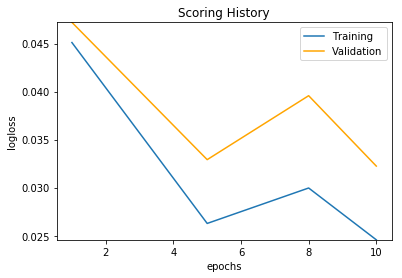

In [31]:
m_def.plot()

## lets increase the epochs to 200 and see if the model overfitted

In [36]:
m200_def = H2ODeepLearningEstimator(epochs = 200,stopping_metric='logloss')
%time m200_def.train(fm,response,train,validation_frame=valid)

deeplearning Model Build progress: |██████████████████████████████████████| 100%
CPU times: user 1.52 s, sys: 164 ms, total: 1.68 s
Wall time: 3min 30s


In [39]:
m200_def.model_performance(test)


ModelMetricsBinomial: deeplearning
** Reported on test data. **

MSE: 0.0023768651620993666
RMSE: 0.0487531041278334
LogLoss: 0.010572426365839434
Mean Per-Class Error: 0.002123142250530785
AUC: 0.9999618923185801
AUCPR: 0.14858871076412522
Gini: 0.9999237846371603

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.697640071133441: 


,,NO,YES,Error,Rate
0,NO,389.0,1.0,0.0026,(1.0/390.0)
1,YES,1.0,470.0,0.0021,(1.0/471.0)
2,Total,390.0,471.0,0.0023,(2.0/861.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,6.976401e-01,0.997877,63.0
1,max f2,6.976401e-01,0.997877,63.0
2,max f0point5,9.644294e-01,0.999148,61.0
3,max accuracy,9.644294e-01,0.997677,61.0
4,max precision,1.000000e+00,1.000000,0.0
5,max recall,2.897650e-03,1.000000,69.0
6,max specificity,1.000000e+00,1.000000,0.0
7,max absolute_mcc,9.644294e-01,0.995326,61.0
8,max min_per_class_accuracy,6.976401e-01,0.997436,63.0
9,max mean_per_class_accuracy,9.644294e-01,0.997877,61.0



Gains/Lift Table: Avg response rate: 54.70 %, avg score: 54.71 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.465738,1.000000e+00,1.828025,1.828025,1.000000,1.000000e+00,1.000000,1.000000,0.851380,0.851380,82.802548,82.802548
1,,2,0.500581,1.000000e+00,1.828025,1.828025,1.000000,1.000000e+00,1.000000,1.000000,0.063694,0.915074,82.802548,82.802548
2,,3,0.600465,2.392768e-13,0.850244,1.665377,0.465116,4.661405e-01,0.911025,0.911196,0.084926,1.000000,-14.975559,66.537718
3,,4,0.700348,5.746419e-30,0.000000,1.427861,0.000000,1.856566e-15,0.781095,0.781241,0.000000,1.000000,-100.000000,42.786070
4,,5,0.800232,1.519188e-40,0.000000,1.249637,0.000000,2.052332e-31,0.683599,0.683727,0.000000,1.000000,-100.000000,24.963716
5,,6,0.900116,6.971831e-51,0.000000,1.110968,0.000000,5.458506e-42,0.607742,0.607856,0.000000,1.000000,-100.000000,11.096774
6,,7,1.000000,1.155622e-83,0.000000,1.000000,0.000000,2.549070e-52,0.547038,0.547141,0.000000,1.000000,-100.000000,0.000000


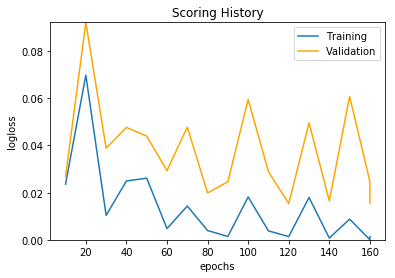

In [40]:
m200_def.plot()

In [41]:
## lets overfit more
m300_def = H2ODeepLearningEstimator(epochs = 300,stopping_metric='logloss')
%time m300_def.train(fm,response,train,validation_frame=valid)

deeplearning Model Build progress: |██████████████████████████████████████| 100%
CPU times: user 862 ms, sys: 95.9 ms, total: 958 ms
Wall time: 2min 7s


In [42]:
m300_def.model_performance(test)


ModelMetricsBinomial: deeplearning
** Reported on test data. **

MSE: 0.0021558898504008307
RMSE: 0.046431560930048764
LogLoss: 0.006464417045088525
Mean Per-Class Error: 0.002123142250530785
AUC: 0.9999782241820458
AUCPR: 0.15284827769589845
Gini: 0.9999564483640917

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.6724733626895381: 


,,NO,YES,Error,Rate
0,NO,389.0,1.0,0.0026,(1.0/390.0)
1,YES,1.0,470.0,0.0021,(1.0/471.0)
2,Total,390.0,471.0,0.0023,(2.0/861.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,6.724734e-01,0.997877,71.0
1,max f2,1.707810e-01,0.998728,74.0
2,max f0point5,7.616871e-01,0.999148,69.0
3,max accuracy,7.616871e-01,0.997677,69.0
4,max precision,1.000000e+00,1.000000,0.0
5,max recall,1.707810e-01,1.000000,74.0
6,max specificity,1.000000e+00,1.000000,0.0
7,max absolute_mcc,7.616871e-01,0.995326,69.0
8,max min_per_class_accuracy,6.724734e-01,0.997436,71.0
9,max mean_per_class_accuracy,7.616871e-01,0.997877,69.0



Gains/Lift Table: Avg response rate: 54.70 %, avg score: 54.66 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.463415,1.000000e+00,1.828025,1.828025,1.000000,1.000000e+00,1.000000,1.000000,0.847134,0.847134,82.802548,82.802548
1,,2,0.500581,1.000000e+00,1.828025,1.828025,1.000000,1.000000e+00,1.000000,1.000000,0.067941,0.915074,82.802548,82.802548
2,,3,0.600465,1.588618e-12,0.850244,1.665377,0.465116,4.608109e-01,0.911025,0.910309,0.084926,1.000000,-14.975559,66.537718
3,,4,0.700348,7.407299e-29,0.000000,1.427861,0.000000,2.152199e-14,0.781095,0.780480,0.000000,1.000000,-100.000000,42.786070
4,,5,0.800232,3.594025e-39,0.000000,1.249637,0.000000,2.054737e-30,0.683599,0.683062,0.000000,1.000000,-100.000000,24.963716
5,,6,0.900116,1.649416e-48,0.000000,1.110968,0.000000,1.223513e-40,0.607742,0.607264,0.000000,1.000000,-100.000000,11.096774
6,,7,1.000000,4.277870e-90,0.000000,1.000000,0.000000,5.756941e-50,0.547038,0.546608,0.000000,1.000000,-100.000000,0.000000


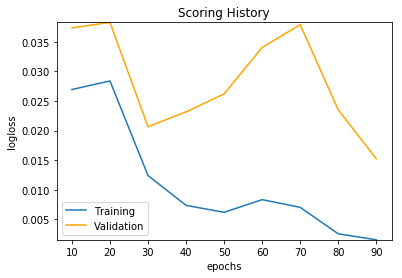

In [43]:
m300_def.plot()

## this is overfitting